# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("zillow_data.csv")

In [4]:
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [5]:
df.iloc[:,160:172]

,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12
0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0
1,202400.0,201700.0,201200.0,200700.0,200000.0,199700.0,199700.0,199900.0,200100.0,200200.0,200200.0,200100.0
2,246700.0,246100.0,245800.0,245900.0,246200.0,246800.0,247200.0,247600.0,247900.0,248000.0,248000.0,249000.0
3,1065400.0,1057800.0,1048900.0,1037900.0,1024300.0,1010200.0,999000.0,990900.0,985400.0,983200.0,982400.0,982400.0
4,121600.0,121200.0,120700.0,120300.0,119700.0,119100.0,118700.0,118400.0,118200.0,117900.0,117600.0,117400.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14718,190700.0,190500.0,189800.0,188700.0,187500.0,186700.0,186600.0,187100.0,187300.0,187500.0,187700.0,188200.0
14719,207900.0,205400.0,202800.0,200900.0,199200.0,197300.0,196400.0,196400.0,196900.0,197600.0,197900.0,198200.0
14720,107600.0,107800.0,108100.0,108200.0,108300.0,108400.0,108400.0,108200.0,107900.0,107600.0,107000.0,106500.0
14721,645000.0,646100.0,646100.0,646800.0,647400.0,647300.0,643100.0,634700.0,625400.0,616900.0,608200.0,602600.0


In [6]:
df['ROI'] = ((df.iloc[:,260:272].mean(axis=1))/(df.iloc[:,160:172].mean(axis=1))-1)*100

In [7]:
df = df.sort_values(['ROI'], ascending=[False])
df[:10]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI
475,62027,11216,New York,NY,New York,Kings,476,146100.0,146600.0,147200.0,...,1506100,1553100,1567700,1559700,1545700,1540200,1553600,1578400,1598700,186.643707
1155,62033,11222,New York,NY,New York,Kings,1156,149200.0,148400.0,147500.0,...,1623800,1638700,1640400,1644100,1651200,1661800,1672800,1694000,1721100,168.108651
5738,97691,94301,Palo Alto,CA,San Jose,Santa Clara,5739,709500.0,711900.0,715000.0,...,4247600,4319300,4401100,4481700,4544700,4595100,4668700,4762600,4818400,167.705936
2470,93200,80010,Aurora,CO,Denver,Arapahoe,2471,70400.0,70800.0,71400.0,...,254000,255700,257700,260600,264000,266500,269500,274100,277600,153.030548
2452,83850,58801,Williston,ND,Williston,Williams,2453,NaN,NaN,NaN,...,231800,233400,233100,231600,229500,228100,227500,226800,226000,148.136450
2054,97693,94303,Palo Alto,CA,San Jose,Santa Clara,2055,374300.0,375900.0,377600.0,...,2456800,2522600,2598400,2647600,2657900,2659800,2683900,2718600,2733900,146.739200
2580,97530,94043,Mountain View,CA,San Jose,Santa Clara,2581,291700.0,294000.0,296400.0,...,1745300,1779800,1812000,1847800,1881900,1915700,1965600,2031800,2074900,146.004988
1791,97527,94040,Mountain View,CA,San Jose,Santa Clara,1792,413200.0,416100.0,419200.0,...,2418700,2478700,2541700,2609400,2669000,2718200,2770500,2820300,2839500,142.983223
2155,93281,80204,Denver,CO,Denver,Denver,2156,72700.0,73200.0,73800.0,...,335300,339500,344100,348300,353000,356800,360800,366600,371600,142.856310
9453,98441,95832,Sacramento,CA,Sacramento,Sacramento,9454,71700.0,71400.0,71200.0,...,244000,245500,245700,245300,246400,248500,249700,249700,248900,142.491144


In [8]:
df['std']=df.loc[:,'2009-01':'2018-04'].std(skipna=True, axis=1)
#Calculate historical mean value
df['mean']=df.loc[:,'2009-01':'2018-04'].mean(skipna=True, axis=1)
#Calculate coefficient of variance
df['CV']=df['std']/df['mean']
#Define upper limit of CV according to risk profile.
upper_cv = df.CV.quantile(.6)
best_ROI = df[df['CV']<upper_cv].sort_values('ROI',axis=0,ascending=False)[:10]
best_ROI

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV
14196,65608,18832,Monroe,PA,Sayre,Bradford,14197,65400.0,65700.0,66000.0,...,124200,124200,124600,124800,124000,123000,44.415205,10525.085558,106157.142857,0.099146
5221,80934,52317,North Liberty,IA,Iowa City,Johnson,5222,NaN,NaN,NaN,...,194800,196200,197500,198600,199800,201000,41.439654,17001.332751,169375.000000,0.100377
13418,64804,16914,Springfield,PA,Sayre,Bradford,13419,69400.0,69800.0,70100.0,...,123800,123700,124600,126400,127200,127200,40.764453,9814.787880,105019.642857,0.093457
6646,91249,76104,Fort Worth,TX,Dallas-Fort Worth,Tarrant,6647,35500.0,35600.0,35700.0,...,76000,76000,76200,77500,80200,81800,40.163934,6318.786658,60527.678571,0.104395
11991,75107,39041,Bolton,MS,Jackson,Hinds,11992,NaN,NaN,NaN,...,128600,130100,131400,130400,126600,123000,39.379145,11283.378590,107884.821429,0.104587
4931,63903,15106,Carnegie,PA,Pittsburgh,Allegheny,4932,69900.0,70100.0,70300.0,...,133800,134600,135600,136600,137500,137700,38.703784,11427.000696,107792.857143,0.106009
12765,91510,76638,Crawford,TX,Waco,McLennan,12766,126500.0,126700.0,127000.0,...,234300,234900,238000,241400,245500,248800,38.103835,19086.593784,192075.892857,0.099370
10686,63434,14131,Ransomville,NY,Buffalo,Niagara,10687,86200.0,85800.0,85400.0,...,159500,160800,162400,164300,165800,166500,37.939845,13077.550591,129503.571429,0.100982
13254,82516,55955,Mantorville,MN,Rochester,Dodge,13255,95400.0,96200.0,97000.0,...,299200,298800,298600,298200,297900,297700,37.768441,25141.544221,240257.142857,0.104644
4254,77016,44116,Rocky River,OH,Cleveland,Cuyahoga,4255,165600.0,165700.0,165800.0,...,259200,260900,263100,265800,267400,267400,37.067005,23153.604765,216275.892857,0.107056


In [9]:
df['USregion'] = df['State']
region_dict = {'CA':'West',
              'OR': 'West',
              'WA': 'West',
              'NV': 'West',
              'ID': 'West',
              'UT': 'West',
              'MT': 'West',
              'WY': 'West',
              'CO': 'West',
               'HI': 'West',
              'AZ': 'SouthWest',
               'NM': 'SouthWest',
               'OK': 'SouthWest',
               'TX': 'SouthWest',
              'ND': 'MidWest',
              'SD': 'MidWest',
              'NE': 'MidWest',
              'KS': 'MidWest',
              'MN': 'MidWest',
              'IA': 'MidWest',
              'MO': 'MidWest',
              'WI': 'MidWest',
              'IL': 'MidWest',
               'IN': 'MidWest',
              'MI': 'MidWest',
              'OH': 'MidWest',
              'AR': 'SouthEast',
              'LA': 'SouthEast',
              'MS': 'SouthEast',
              'AL': 'SouthEast',
              'TN': 'SouthEast',
              'KY': 'SouthEast',
              'WV': 'SouthEast',
              'DC': 'SouthEast',
              'VA': 'SouthEast',
              'NC': 'SouthEast',
              'SC': 'SouthEast',
              'GA': 'SouthEast',
              'FL': 'SouthEast',
              'ME': 'NorthEast',
              'NH': 'NorthEast',
              'VT': 'NorthEast',
              'MA': 'NorthEast',
              'RI': 'NorthEast',
              'CT': 'NorthEast',
              'NY': 'NorthEast',
              'NY': 'NorthEast',
              'NJ': 'NorthEast',
              'PA': 'NorthEast',
              'MD': 'NorthEast',
              'DE': 'NorthEast'}

df.USregion.replace(region_dict, inplace=True)

In [10]:
USregions = df.USregion.value_counts().index.tolist()

In [11]:
for region in USregions:
    df.append(df[df['USregion']=='region'].sort_values('ROI',axis=0,ascending=False)[:1])

In [12]:
a = df[(df['USregion']=='NorthEast')&(df['CV']<upper_cv)].sort_values('ROI',axis=0,ascending=False)[:1]
a

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
14196,65608,18832,Monroe,PA,Sayre,Bradford,14197,65400.0,65700.0,66000.0,...,124200,124600,124800,124000,123000,44.415205,10525.085558,106157.142857,0.099146,NorthEast


In [13]:
b = df[(df['USregion']=='SouthEast')&(df['CV']<upper_cv)].sort_values('ROI',axis=0,ascending=False)[:1]
b

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
11991,75107,39041,Bolton,MS,Jackson,Hinds,11992,NaN,NaN,NaN,...,130100,131400,130400,126600,123000,39.379145,11283.37859,107884.821429,0.104587,SouthEast


In [14]:
c = df[(df['USregion']=='MidWest')&(df['CV']<upper_cv)].sort_values('ROI',axis=0,ascending=False)[:1]
c

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
5221,80934,52317,North Liberty,IA,Iowa City,Johnson,5222,NaN,NaN,NaN,...,196200,197500,198600,199800,201000,41.439654,17001.332751,169375.0,0.100377,MidWest


In [15]:
d = df[(df['USregion']=='SouthWest')&(df['CV']<upper_cv)].sort_values('ROI',axis=0,ascending=False)[:1]
d

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
6646,91249,76104,Fort Worth,TX,Dallas-Fort Worth,Tarrant,6647,35500.0,35600.0,35700.0,...,76000,76200,77500,80200,81800,40.163934,6318.786658,60527.678571,0.104395,SouthWest


In [16]:
e = df[(df['USregion']=='West')&(df['CV']<upper_cv)].sort_values('ROI',axis=0,ascending=False)[:1]
e

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
8692,100181,99320,Benton City,WA,Kennewick,Benton,8693,NaN,NaN,NaN,...,186100,186300,186100,185800,185800,35.140892,14616.566005,150027.678571,0.097426,West


In [17]:
frames = [a,b,c,d,e]
result = pd.concat(frames)
result

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
14196,65608,18832,Monroe,PA,Sayre,Bradford,14197,65400.0,65700.0,66000.0,...,124200,124600,124800,124000,123000,44.415205,10525.085558,106157.142857,0.099146,NorthEast
11991,75107,39041,Bolton,MS,Jackson,Hinds,11992,NaN,NaN,NaN,...,130100,131400,130400,126600,123000,39.379145,11283.378590,107884.821429,0.104587,SouthEast
5221,80934,52317,North Liberty,IA,Iowa City,Johnson,5222,NaN,NaN,NaN,...,196200,197500,198600,199800,201000,41.439654,17001.332751,169375.000000,0.100377,MidWest
6646,91249,76104,Fort Worth,TX,Dallas-Fort Worth,Tarrant,6647,35500.0,35600.0,35700.0,...,76000,76200,77500,80200,81800,40.163934,6318.786658,60527.678571,0.104395,SouthWest
8692,100181,99320,Benton City,WA,Kennewick,Benton,8693,NaN,NaN,NaN,...,186100,186300,186100,185800,185800,35.140892,14616.566005,150027.678571,0.097426,West


In [18]:
best_ROI

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV
14196,65608,18832,Monroe,PA,Sayre,Bradford,14197,65400.0,65700.0,66000.0,...,124200,124200,124600,124800,124000,123000,44.415205,10525.085558,106157.142857,0.099146
5221,80934,52317,North Liberty,IA,Iowa City,Johnson,5222,NaN,NaN,NaN,...,194800,196200,197500,198600,199800,201000,41.439654,17001.332751,169375.000000,0.100377
13418,64804,16914,Springfield,PA,Sayre,Bradford,13419,69400.0,69800.0,70100.0,...,123800,123700,124600,126400,127200,127200,40.764453,9814.787880,105019.642857,0.093457
6646,91249,76104,Fort Worth,TX,Dallas-Fort Worth,Tarrant,6647,35500.0,35600.0,35700.0,...,76000,76000,76200,77500,80200,81800,40.163934,6318.786658,60527.678571,0.104395
11991,75107,39041,Bolton,MS,Jackson,Hinds,11992,NaN,NaN,NaN,...,128600,130100,131400,130400,126600,123000,39.379145,11283.378590,107884.821429,0.104587
4931,63903,15106,Carnegie,PA,Pittsburgh,Allegheny,4932,69900.0,70100.0,70300.0,...,133800,134600,135600,136600,137500,137700,38.703784,11427.000696,107792.857143,0.106009
12765,91510,76638,Crawford,TX,Waco,McLennan,12766,126500.0,126700.0,127000.0,...,234300,234900,238000,241400,245500,248800,38.103835,19086.593784,192075.892857,0.099370
10686,63434,14131,Ransomville,NY,Buffalo,Niagara,10687,86200.0,85800.0,85400.0,...,159500,160800,162400,164300,165800,166500,37.939845,13077.550591,129503.571429,0.100982
13254,82516,55955,Mantorville,MN,Rochester,Dodge,13255,95400.0,96200.0,97000.0,...,299200,298800,298600,298200,297900,297700,37.768441,25141.544221,240257.142857,0.104644
4254,77016,44116,Rocky River,OH,Cleveland,Cuyahoga,4255,165600.0,165700.0,165800.0,...,259200,260900,263100,265800,267400,267400,37.067005,23153.604765,216275.892857,0.107056


In [19]:
df[df['ROI'].isna()]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,CV,USregion
36,61796,10456,New York,NY,New York,Bronx,37,NaN,NaN,NaN,...,368500,374100,379800,388100,394400,NaN,37040.884987,3.130596e+05,0.118319,NorthEast
105,84613,60611,Chicago,IL,Chicago,Cook,106,NaN,NaN,NaN,...,1486000,1497300,1508600,1508100,1493200,NaN,65209.304805,1.383109e+06,0.047147,MidWest
469,87563,67401,Salina,KS,Salina,Saline,470,NaN,NaN,NaN,...,115500,115500,115500,115400,115400,NaN,7090.423159,1.029633e+05,0.068864,MidWest
713,73596,35758,Madison,AL,Huntsville,Madison,714,NaN,NaN,NaN,...,216100,217700,221000,224700,227500,NaN,11314.366022,2.016141e+05,0.056119,SouthEast
842,70817,30032,Candler-Mcafee,GA,Atlanta,Dekalb,843,NaN,NaN,NaN,...,122300,125400,128600,132800,135900,NaN,25403.366419,7.919483e+04,0.320771,SouthEast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14669,82632,56120,Butterfield,MN,NaN,Watonwan,14670,NaN,NaN,NaN,...,132600,131100,132900,133900,133600,NaN,18735.201215,8.808061e+04,0.212705,MidWest
14674,94662,84726,Escalante,UT,NaN,Garfield,14675,NaN,NaN,NaN,...,179400,178900,178400,177900,177900,NaN,18437.015681,1.497531e+05,0.123116,West
14706,59046,3215,Waterville Valley,NH,Claremont,Grafton,14707,NaN,NaN,NaN,...,796800,808100,811600,806500,796600,NaN,60509.272864,7.455809e+05,0.081157,NorthEast
14707,69681,28039,East Spencer,NC,Charlotte,Rowan,14708,NaN,NaN,NaN,...,25600,25800,26600,27700,28300,NaN,1876.121243,2.828043e+04,0.066340,SouthEast


In [20]:
majorcities = ['New York','Los Angeles','Houston''Chicago','Las Vegas','Houston']

# Step 2: Data Preprocessing

In [21]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

# Step 3: EDA and Visualization

In [22]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

NameError: name 'matplotlib' is not defined

# Step 4: Reshape from Wide to Long Format

In [23]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName','ROI','std','mean','CV','USregion'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [24]:
a_ts=melt_data(a)
a_ts

,value
time,
1996-04-01,65400.0
1996-05-01,65700.0
1996-06-01,66000.0
1996-07-01,66200.0
1996-08-01,66400.0
...,...
2017-12-01,124200.0
2018-01-01,124600.0
2018-02-01,124800.0


In [25]:
b_ts=melt_data(b)
b_ts

,value
time,
2005-07-01,113200.0
2005-08-01,114400.0
2005-09-01,115200.0
2005-10-01,115700.0
2005-11-01,116300.0
...,...
2017-12-01,130100.0
2018-01-01,131400.0
2018-02-01,130400.0


In [26]:
c_ts=melt_data(c)
c_ts

,value
time,
2006-01-01,140500.0
2006-02-01,141500.0
2006-03-01,143200.0
2006-04-01,144900.0
2006-05-01,146700.0
...,...
2017-12-01,196200.0
2018-01-01,197500.0
2018-02-01,198600.0


In [27]:
#red
d_ts=melt_data(d)
d_ts

,value
time,
1996-04-01,35500.0
1996-05-01,35600.0
1996-06-01,35700.0
1996-07-01,35800.0
1996-08-01,35800.0
...,...
2017-12-01,76000.0
2018-01-01,76200.0
2018-02-01,77500.0


In [28]:
#purple

e_ts=melt_data(e)
e_ts

,value
time,
2003-07-01,139800.0
2003-08-01,135400.0
2003-09-01,131800.0
2003-10-01,129200.0
2003-11-01,127700.0
...,...
2017-12-01,186100.0
2018-01-01,186300.0
2018-02-01,186100.0


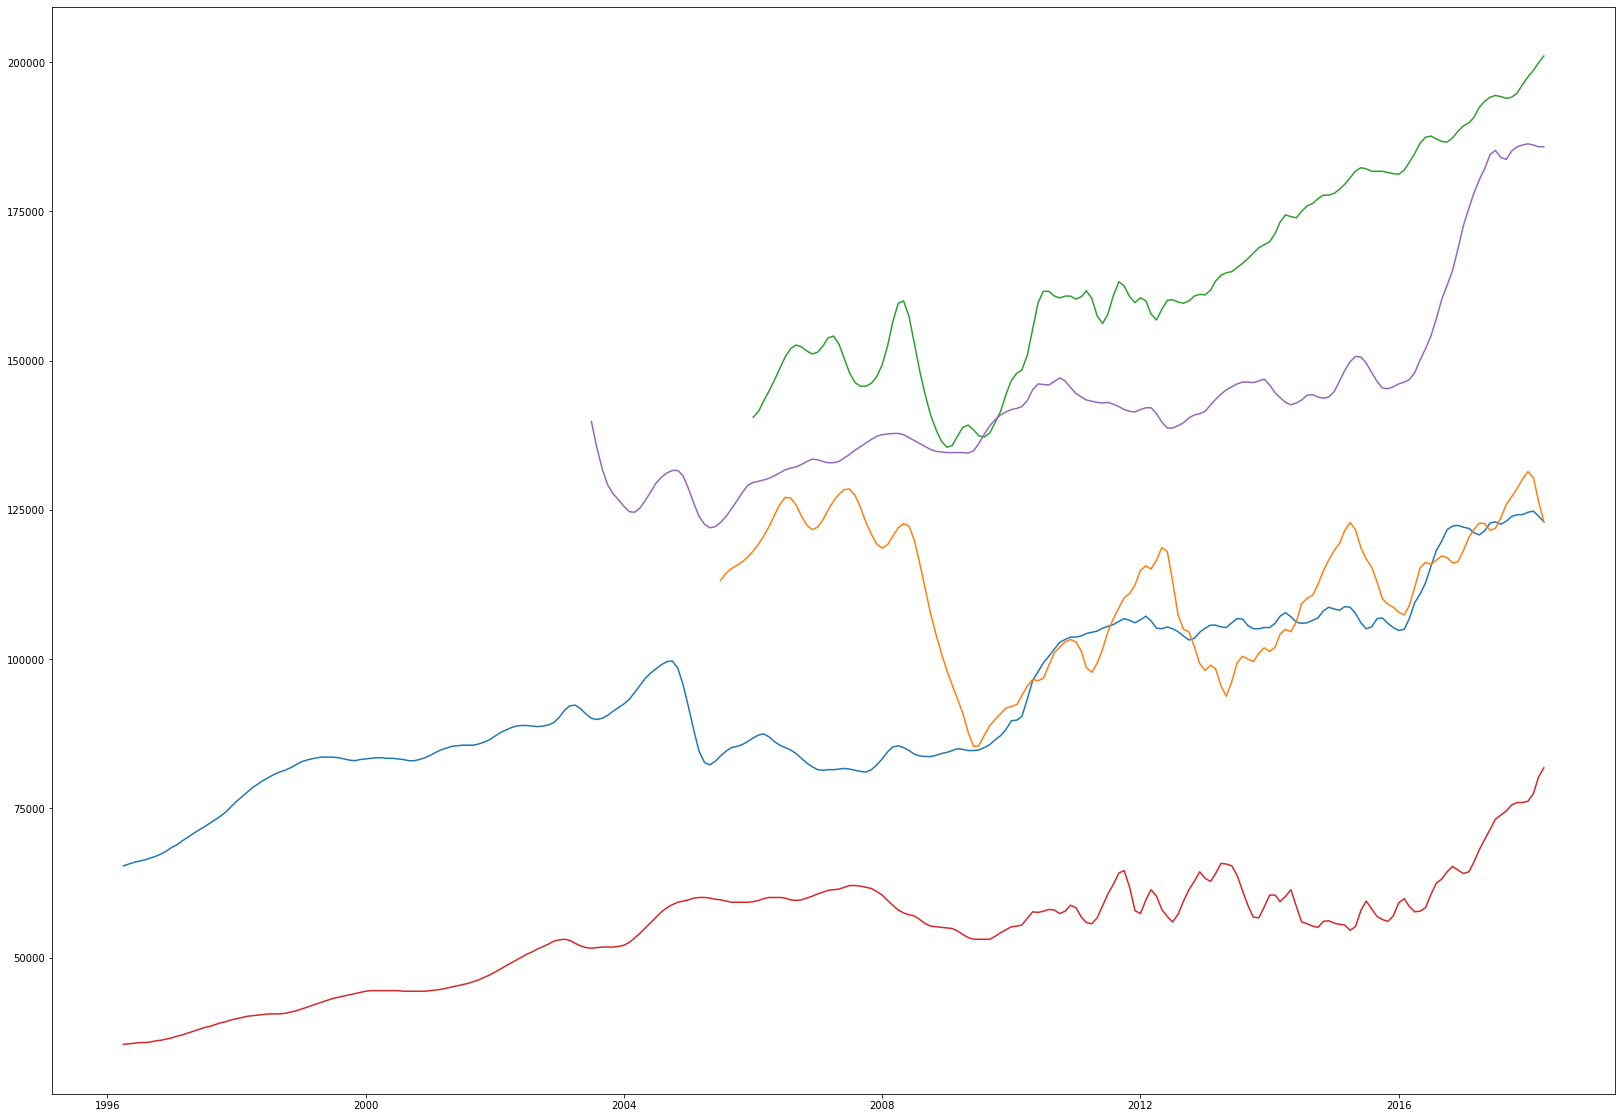

In [29]:
import matplotlib.pyplot as plt
varlist = [a_ts,b_ts,c_ts,d_ts,e_ts]
plt.figure(figsize=(28,20))
for variable in varlist:
    plt.plot(variable)
    

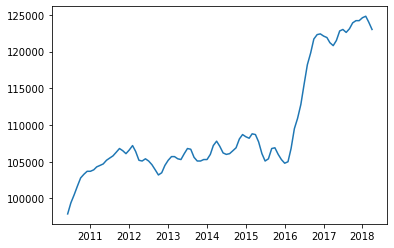

In [30]:
plt.plot(a_ts[170:])

# Testing for Stationarity

In [31]:
#using the rolling mean for each time series

#varlist = [a_ts,b_ts,c_ts,d_ts,e_ts]
#for variable in varlist:
    #rolmean = variable.rolling(window=6, center=False).mean()
    #rolstd = variable.rolling(window=1, center=False).std()


a_diff = a_ts.diff().dropna()  
b_diff = b_ts.diff().dropna()
c_diff = c_ts.diff().dropna()
d_diff = d_ts.diff().dropna()
e_diff = e_ts.diff().dropna()
    

#for i in range(len(dfs_ts)):
 #rolmean = dfs_ts[i].ret.rolling(window = 12, center = False).mean()
 #rolstd = dfs_ts[i].ret.rolling(window = 12, center = False).std()
 #fig = plt.figure(figsize=(11,5))
 #orig = plt.plot(dfs_ts[i].ret, color=’blue’,label=’Original’)
 #mean = plt.plot(rolmean, color=’red’, label=’Rolling Mean’)
 #std = plt.plot(rolstd, color=’black’, label = ‘Rolling Std’)
 #plt.legend(loc=’best’)
 #plt.title(f’Rolling Mean & Standard Deviation for Zipcode: {dfs_ts[i].RegionName[0]}’)
 #plt.show()





In [32]:
from statsmodels.tsa.stattools import adfuller
#A time series Differencing
result = adfuller(a_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Reject the null hypothesis. Data is Stationary')

ADF Statistic: -3.489009
p-value: 0.008274
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Reject the null hypothesis. Data is Stationary


In [33]:
#B time series differencing 
from statsmodels.tsa.stattools import adfuller
#from index 160
result = adfuller(b_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Reject the Null hypothesis. Data is Stationary')

ADF Statistic: -3.851033
p-value: 0.002426
Critical Values:
	1%: -3.477
	5%: -2.882
	10%: -2.578
Reject the Null hypothesis. Data is Stationary


In [34]:
from statsmodels.tsa.stattools import adfuller
#c time series differencing
#from index 160
result = adfuller(c_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Reject the Null Hypothesis. Data is Stationary')

ADF Statistic: -3.813225
p-value: 0.002775
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.578
Reject the Null Hypothesis. Data is Stationary


In [35]:
from statsmodels.tsa.stattools import adfuller
#from index 160
result = adfuller(d_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Fail to Reject the Null. Data is not Stationary')

ADF Statistic: -2.384689
p-value: 0.146104
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Fail to Reject the Null. Data is not Stationary


In [36]:
from statsmodels.tsa.stattools import adfuller
#from index 160
result = adfuller(e_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
print('Fail to Reject the Null. Data is not Stationary')

ADF Statistic: -2.361938
p-value: 0.152769
Critical Values:
	1%: -3.471
	5%: -2.880
	10%: -2.576
Fail to Reject the Null. Data is not Stationary


# decomposing time series d and e


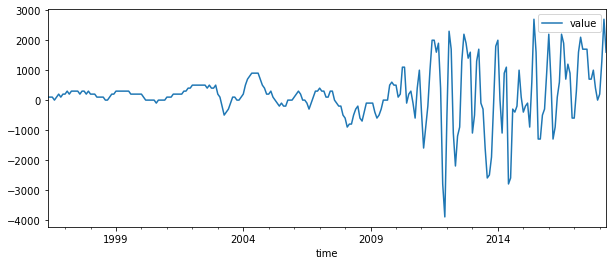

In [37]:
d_diff.plot(figsize=(10, 4));

In [38]:
import numpy as np
#np.log(d_diff).plot(figsize=(10, 4));





In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(d_diff)

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

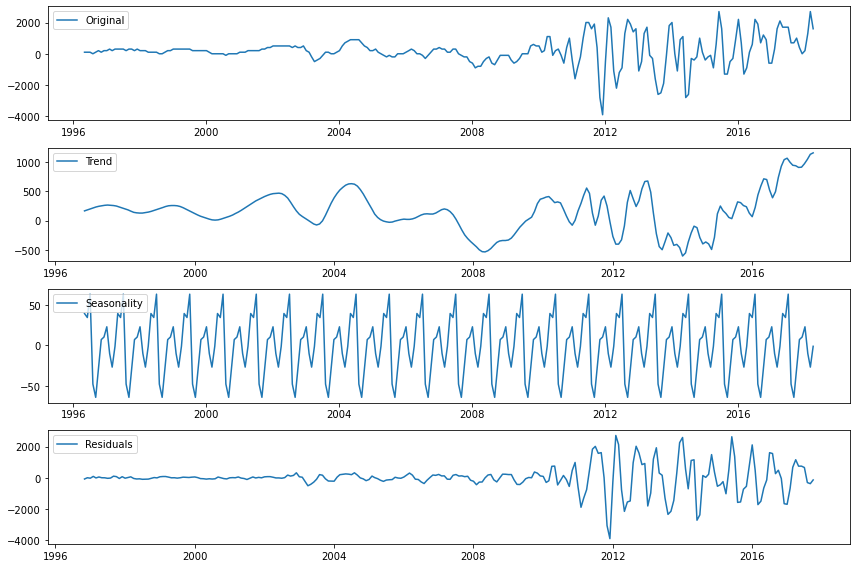

In [40]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(d_diff, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

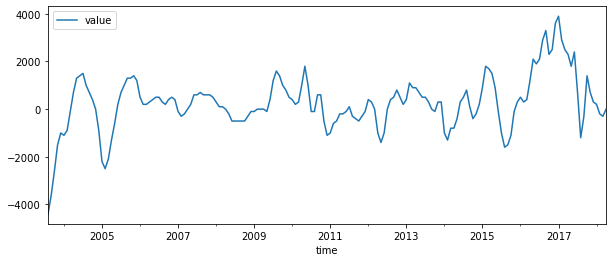

In [41]:
#now let us continue to decomp of e
e_diff.plot(figsize= (10,4));

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(e_diff)

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

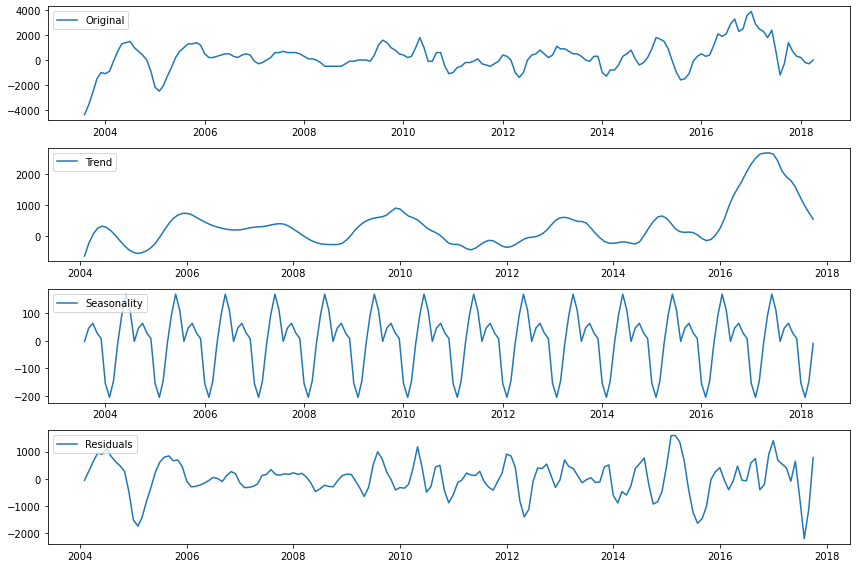

In [43]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(e_diff, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

# Step 5: ARIMA Modeling

In [44]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

import itertools

In [45]:
a_diff.columns

Index(['value'], dtype='object')

In [46]:
#2016 train test split 2017-2018 test
cutoff = "2016-12-01"
cutoff

'2016-12-01'

In [47]:
#train-test split for all 5 time series
train_a = a_diff['2009':cutoff]
test_a = a_diff[cutoff:]
train_b = b_diff['2009':cutoff]
test_b = b_diff[cutoff:]
train_c = c_diff['2009':cutoff]
test_c = c_diff[cutoff:]
train_d = d_diff['2009':cutoff]
test_d = d_diff[cutoff:]
train_e = e_diff['2009':cutoff]

In [48]:
#split = TimeSeriesSplit()

#for train_ind, val_ind in split.split(train):
    #print(train_ind, val_ind)

### Baseline Model

In [54]:
# we can perform this with the shift operator
# The prediction for the next day is the original series shifted to the future by one day.
naive_a = train_a.shift(1)
naive_a

,value
time,
2009-01-01,NaN
2009-02-01,200.0
2009-03-01,300.0
2009-04-01,300.0
2009-05-01,-100.0
...,...
2016-08-01,2700.0
2016-09-01,2700.0
2016-10-01,1600.0


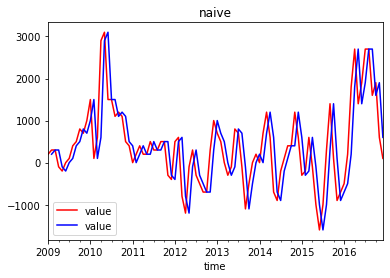

In [55]:
fig, ax = plt.subplots()

train_a[:].plot(ax=ax, c='r', label='original')
naive[:].plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();

In [56]:
#RMSE of the naive model
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(train_a[1:], naive_a.dropna()))

693.9588945812433

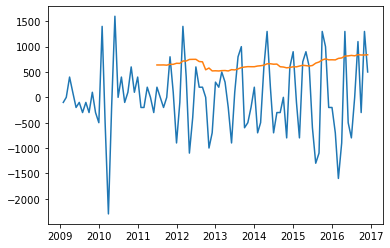

In [57]:
fig, ax = plt.subplots()
residuals = naive_a[1:] - train_a[1:]
ax.plot(residuals.index, residuals)
ax.plot(residuals.index, residuals.rolling(30).std());

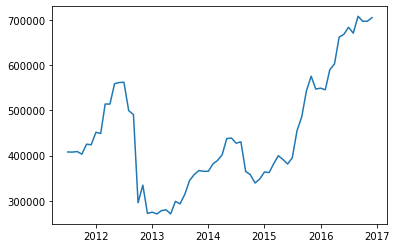

In [58]:
fig, ax = plt.subplots()

ax.plot(residuals.index, residuals.rolling(30).var());

In [51]:
#fitting train into ARIMA model
ma_a = ARIMA(train_a, order=(0, 0, 1)).fit()
y_hat_a = ma_a.predict(btyp='levels')
ma_b = ARIMA(train_b, order=(0, 0, 1)).fit()
y_hat_b = ma_b.predict(btyp='levels')
ma_c = ARIMA(train_c, order=(0, 0, 1)).fit()
y_hat_c = ma_c.predict(btyp='levels')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/envs/learn-env/lib/python3.8

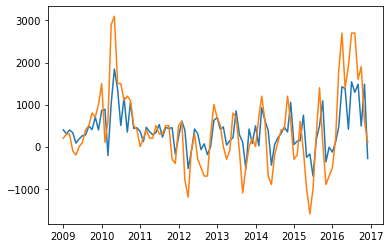

In [52]:
fig, ax = plt.subplots()
ax.plot(y_hat_a)
ax.plot(train_a);

In [53]:
ma_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   96
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -755.417
Date:                Mon, 28 Mar 2022   AIC                           1516.834
Time:                        15:54:03   BIC                           1524.527
Sample:                    01-01-2009   HQIC                          1519.944
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        398.2740    125.897      3.163      0.002     151.520     645.028
ma.L1          0.7695      0.068     11.242      0.000       0.635       0.904
sigma2      3.966e+05   5.49e+04      7.220      0.000    2.89e+05    5.04e+05
===================================================================================
Ljung-Box (L1) (Q):                   9.68   Jarque-Bera (JB):                 6.85
Prob(Q):                              0.00   Prob(JB):                         0.03
Heteroskedasticity (H):               2.15   Skew:                             0.60
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

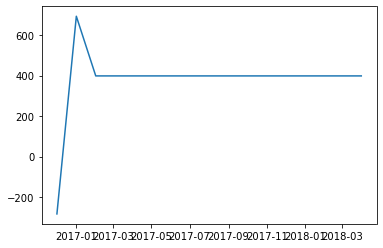

In [54]:
y_hat_test_a = ma_a.predict(start=test_a.index[0], end=test_a.index[-1],typ='levels')

fig, ax = plt.subplots()
ax.plot(y_hat_test_a);

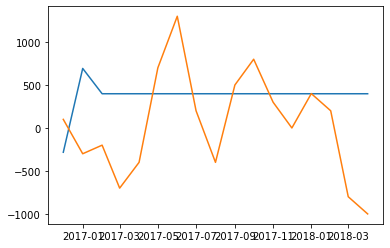

In [55]:
fig, ax = plt.subplots()
ax.plot(y_hat_test_a)
ax.plot(test_a);

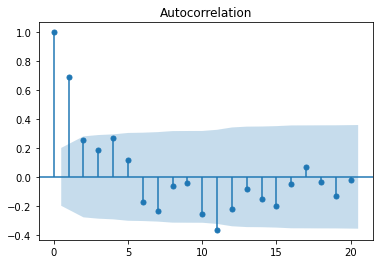

In [56]:
plot_acf(train_b.dropna());

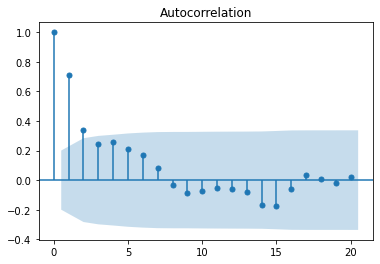

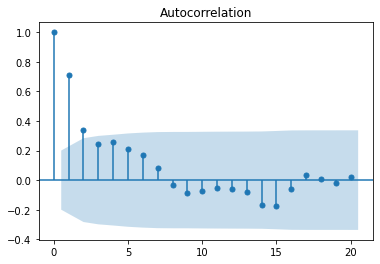

In [59]:
plot_acf(train_a.dropna())

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
np.sqrt(mean_squared_error(test_a, y_hat_test_a))

714.723768624636

In [57]:
#fitting train into SARIMA model
p = q = range(0, 2)
pdq = list(itertools.product(p, [1], q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, [1], q))]
print('Examples of parameter for SARIMA...')
for i in pdq:
    for s in seasonal_pdq:
        print('SARIMAX: {} x {}'.format(i, s))

Examples of parameter for SARIMA...
SARIMAX: (0, 1, 0) x (0, 1, 0, 52)
SARIMAX: (0, 1, 0) x (0, 1, 1, 52)
SARIMAX: (0, 1, 0) x (1, 1, 0, 52)
SARIMAX: (0, 1, 0) x (1, 1, 1, 52)
SARIMAX: (0, 1, 1) x (0, 1, 0, 52)
SARIMAX: (0, 1, 1) x (0, 1, 1, 52)
SARIMAX: (0, 1, 1) x (1, 1, 0, 52)
SARIMAX: (0, 1, 1) x (1, 1, 1, 52)
SARIMAX: (1, 1, 0) x (0, 1, 0, 52)
SARIMAX: (1, 1, 0) x (0, 1, 1, 52)
SARIMAX: (1, 1, 0) x (1, 1, 0, 52)
SARIMAX: (1, 1, 0) x (1, 1, 1, 52)
SARIMAX: (1, 1, 1) x (0, 1, 0, 52)
SARIMAX: (1, 1, 1) x (0, 1, 1, 52)
SARIMAX: (1, 1, 1) x (1, 1, 0, 52)
SARIMAX: (1, 1, 1) x (1, 1, 1, 52)


In [58]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=SARIMAX(train_d,
                         order=param,
                         seasonal_order=param_seasonal,
                         enforce_stationarity=False,
                         enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('Oops!')
            continue

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 0)x(0, 1, 0, 52) - AIC:746.1744247703258


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(0, 1, 1, 52) - AIC:4.0


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 0)x(1, 1, 0, 52) - AIC:4.0


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 0)x(1, 1, 1, 52) - AIC:6.0


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(0, 1, 0, 52) - AIC:712.804839604669


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(0, 1, 1, 52) - AIC:6.0


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 1, 0, 52) - AIC:6.0


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 1, 1, 52) - AIC:8.0


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(0, 1, 0, 52) - AIC:746.288785289428


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(0, 1, 1, 52) - AIC:6.0


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(1, 1, 0, 52) - AIC:6.0


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(1, 1, 1, 52) - AIC:8.0


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(0, 1, 0, 52) - AIC:711.5495274201229


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(0, 1, 1, 52) - AIC:8.0


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 1, 0, 52) - AIC:8.0


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 1, 1, 52) - AIC:10.0


In [59]:
sari_mod =SARIMAX(train_d,
                  order=(0, 1, 0),
                  seasonal_order=(0, 1, 1, 52),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit()

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [60]:
for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(0, 1, 2)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

NameError: name 'split' is not defined

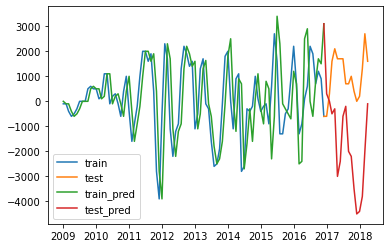

In [61]:
y_hat_train_d = sari_mod.predict(typ='levels')
y_hat_test_d = sari_mod.predict(start=test_d.index[0], end=test_d.index[-1],typ='levels')

fig, ax = plt.subplots()
ax.plot(train_d, label='train')
ax.plot(test_d, label='test')
ax.plot(y_hat_train_d, label='train_pred')
ax.plot(y_hat_test_d, label='test_pred')

plt.legend();

# Step 6: Interpreting Results